In [5]:
import random
import pandas as pd
import math
import matplotlib.pyplot as plt

# Загрузить данные

In [6]:
def load_data():
  df = pd.read_csv("city.csv")
  citynames = df["city"].tolist()
  lat = df["lat"].tolist()
  lng = df["lng"].tolist()
  return citynames, list(zip(lat, lng))

citynames, points = load_data()
n_cities = len(citynames)

In [7]:
def path_cost(path, points):
  prev_x, prev_y = points[path[0]]
  end_x, end_y = points[path[-1]]
  cost = math.sqrt((prev_x - end_x) ** 2 + (prev_y - end_y) ** 2)
  for i in path[1:]:
    x, y = points[i]
    cost += math.sqrt((prev_x - x) ** 2 + (prev_y - y)**2)
    prev_x, prev_y = x, y
  return cost

def plot_path(path, points):
  print("Path cost: ", path_cost(path, points))
  path_points = [points[p] for p in path]
  x, y = [p[0] for p in path_points], [p[1] for p in path_points]
  x.append(path_points[0][0])
  y.append(path_points[0][1])
  plt.plot(x, y)
  plt.scatter(x, y)
  fig = plt.gcf()
  fig.set_size_inches([16, 9])

# Алгоритм

In [35]:
import random

class Ant:
  def __init__(self, points, pheromone_map, pheromone_w=1, distance_w=1):
    self.points = points
    self.N = len(points)
    self.pheromone_map = pheromone_map
    self.pheromone_w = pheromone_w
    self.distance_w = distance_w

    self.pheromone_delta = []
    for _ in range(self.N):
      self.pheromone_delta.append([0] * self.N)

  def travel(self):
    current = random.choice(range(self.N))
    unvisited = list(range(self.N))
    unvisited.remove(current)
    path = [current]

    for i in range(self.N - 1):
      weights = [self.edge_weight(current, n) for n in unvisited]
      w_sum = sum(weights)
      weights = [w / w_sum for w in weights]
      next_n = random.choices(unvisited, weights=weights, k=1)[0]
      path.append(next_n)
      unvisited.remove(next_n)
      self.pheromone_delta[current][next_n] = 1 / self.distance(current, next_n)
      current = next_n

    return path


  def distance(self, i, j):
    xp1, yp1 = self.points[i]
    xp2, yp2 = self.points[j]
    return math.sqrt((xp1 - xp2) ** 2 + (yp1 - yp2) ** 2)

  def edge_weight(self, i, j):
    return self.pheromone_map[i][j] ** self.pheromone_w * (1.0 / self.distance(i, j)) ** self.distance_w

  def update_pheromone_map(self):
    for i in range(self.N):
      for j in range(self.N):
        self.pheromone_map[i][j] += self.pheromone_delta[i][j]
        self.pheromone_delta[i][j] = 0

def create_pheromone_map(N):
  pheromone = []
  for _ in range(N):
    pheromone.append([0.1] * N)
  return pheromone
  
def decay_pheromone(pheromone_map, decay_rate=0.9):
  for row in pheromone_map:
    for i in range(len(row)):
      row[i] *= decay_rate
  return pheromone_map


def run_antcolony(points, n_ants=500, n_travels=2000):
  pheromone = create_pheromone_map(len(points))
  colony = [Ant(points, pheromone)]
  best_path = None
  best_cost = None
  for i in range(n_travels):
    for ant in colony:
      path = ant.travel()
      cur_cost = path_cost(path, points)
      if best_cost is None or cur_cost < best_cost:
        best_cost = cur_cost
        best_path = path
      ant.update_pheromone_map()
    decay_pheromone(pheromone)
  return best_path

In [36]:
best = run_antcolony(points)

Path cost:  832.6982195963578


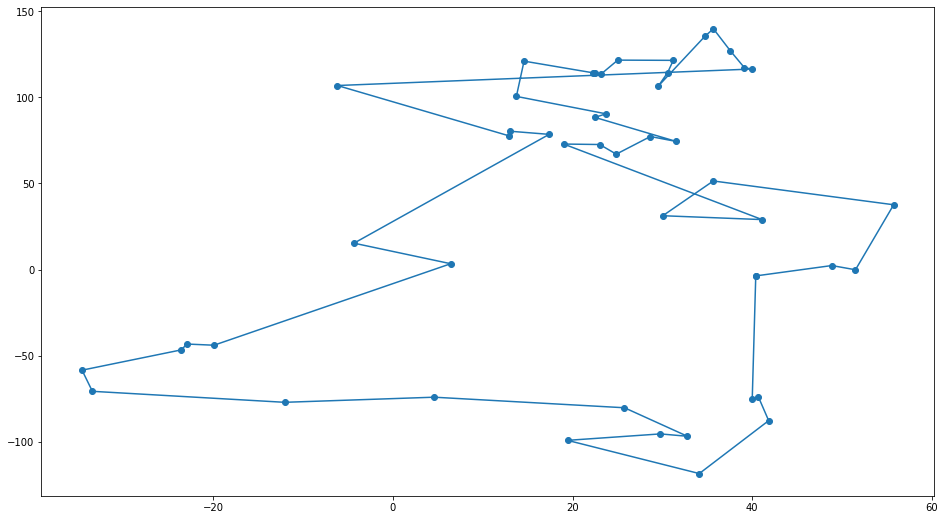

In [37]:
plot_path(best, points)